4410


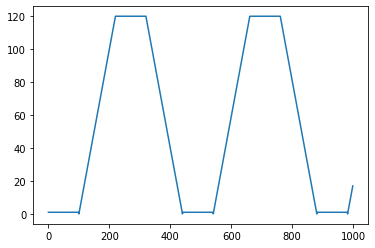

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing

#time = 10 #sec
samples = 1
slot = 100*samples
sensores = 1

periodo = 120
noise = 1

data = np.ones((slot, sensores))

# data = np.transpose(np.concatenate(10*[np.random.normal(0, noise, slot),
#                                     np.array([np.random.normal(x, noise, 1) for x in range(120)]).squeeze(1),
#                                     np.random.normal(periodo, noise, slot),
#                                     np.array([np.random.normal(x, noise, 1) for x in range(120,
#                                                                                            -1, -1)]).squeeze(1)]))

data = np.transpose(np.concatenate(10*[np.array(100*[1]),
                                    np.array([x for x in range(120)]),#.squeeze(1),
                                    np.array(100*[periodo]),
                                    np.array([x for x in range(120, -1, -1)])]))

#data = np.transpose(np.random.normal(0, noise, slot))

#data = preprocessing.normalize(data)
plt.plot(data[:slot*10]) #out_pressure
print(len(data))

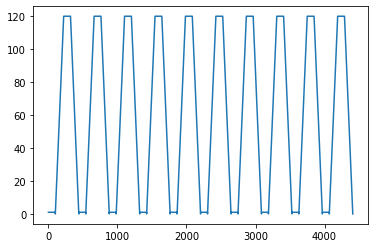

In [11]:
plt.plot(data[:9000]) #out_pressure

In [12]:
import torch
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
#y = data
#x = np.arange(0, len(y)).reshape((-1, 1))

xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)

X = np.random.normal(size=n_samples)
y = data.astype(float)
#X[X > 0] *= 4
#X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

plt.figure(1, figsize=(9, 6))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)

X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()

plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ValueError: Found input variables with inconsistent numbers of samples: [100, 4410]

In [13]:
y.shape

(4410,)

In [14]:
from matplotlib.pyplot import figure

figure(figsize=(8, 3), dpi=80)

print(slot)

N = slot # sample count
P = 50  # period
D = 5   # width of pulse
sig = (np.arange(N) % P < D)*10

data = sig + data[:1000]
#data[:] = sig + data[:9000]
#data[:] = sig + data[:9000]
#data[:] = sig + data[:9000]
# data.shape
plt.plot(data)

100


ValueError: operands could not be broadcast together with shapes (100,) (1000,) 

<Figure size 640x240 with 0 Axes>

In [15]:
from sklearn.model_selection import train_test_split

#X_train, X_test = train_test_split(data, test_size=0.15, random_state=1)

percentage = 0.50
train_split = int(len(data)*percentage)

#valid_split = train_split + int(len(data)*percentage)

X_train = data[:train_split]
X_test = data[train_split:]

print(X_train.shape)
print(X_test.shape)

(2205,)
(2205,)


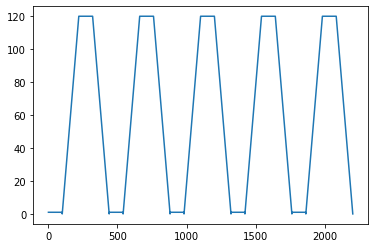

In [16]:
plt.plot(X_train)

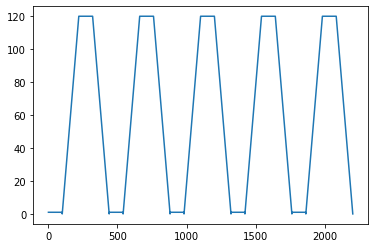

In [17]:
plt.plot(X_test)

In [18]:
import h5py

h5f = h5py.File('../Datasets/sintetic_data/train_compressor_data.h5', 'w')
h5f.create_dataset('data_train', data = X_train)

# h5f = h5py.File('../Datasets/sintetic_data/valid_compressor_data.h5', 'w')
# h5f.create_dataset('data_valid', data = X_valid)

h5f = h5py.File('../Datasets/sintetic_data/test_compressor_data.h5', 'w')
h5f.create_dataset('data_test', data = X_test)

<HDF5 dataset "data_test": shape (2205,), type "<i8">

In [19]:



sig_linear = np.arange(0, 100, 1)

sig_exp = -0.9**np.arange(0, 100, 1)

signal = sig[:100] + data[:100, 0] + sig_exp

plt.plot(signal)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [20]:
T = 10

f = 1/T

t = np.arange(0 , T, f)


A = t



carrier = A*np.sin(2*np.pi*t)

carrier = data[:len(carrier), 0] + carrier

plt.plot(carrier)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [21]:
class SinteticSignal:

IndentationError: expected an indented block (982907090.py, line 1)